## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [12]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [19]:
def resizeimage(image, factor):
    figure1 = plt.figure()

    NearestImage = misc.imresize(image, factor, 'nearest')
    image1 = figure1.add_subplot(1,3,1)
    image1.imshow(NearestImage)
    image1.set_title('NearestImage')

    BilinearIMage = misc.imresize(image, factor, 'bilinear')
    image2 = figure1.add_subplot(1,3,2)
    image2.imshow(BilinearIMage)
    image2.set_title('BilinearIMage')

    BicubicImage = misc.imresize(image, factor, 'bicubic')
    image3 = figure1.add_subplot(1,3,3)
    image3 .imshow(BicubicImage)
    image3 .set_title('BicubicImage')

    return NearestImage, BilinearIMage, BicubicImagedef resizeimage(image, factor):
    figure1 = plt.figure()


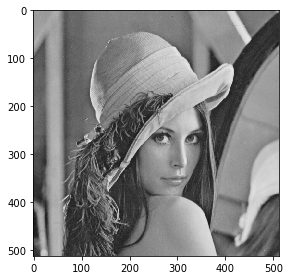

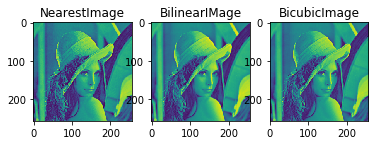

In [20]:
LenaImage = io.imread('./images/lena-grey.bmp')
io.imshow(LenaImage)
LenaIMageResize = resizeimage(LenaImage,50)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


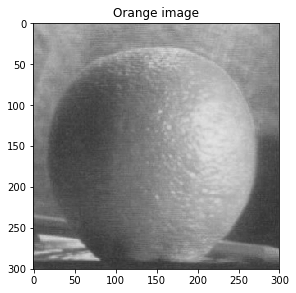

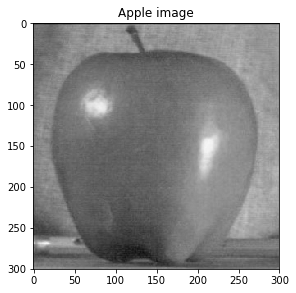

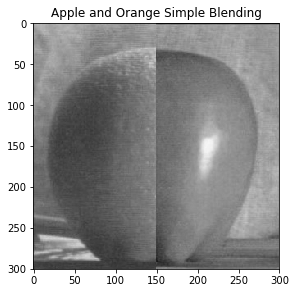

In [24]:
def simple_blend(img1, img2):

    img = np.zeros(np.shape(img1)) 
    row, col = np.shape(img)
    for i in range(0, row):
        for j in range(0, col):
            img[i,j]=img2[i,j]
    for i in range(0, row):
        for j in range(0, np.ceil(col/2).astype('ubyte')):
            img[i,j]=img1[i,j]
    return img


Orange_img = io.imread("./images/orange.jpeg",as_grey=True)
Apple_img =  io.imread("./images/apple.jpeg",as_grey=True)                      
blend_img = simple_blend(apple_gray, orange_gray)

io.imshow(Orange_img)
plt.title('Orange image')
io.show()

io.imshow(Apple_img)
plt.title('Apple image')
io.show()

b_simple = simple_blend(Orange_img,Apple_img)
io.imshow(b_simple)
plt.title('Apple and Orange Simple Blending')



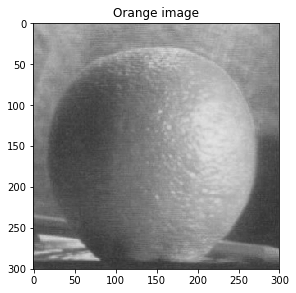

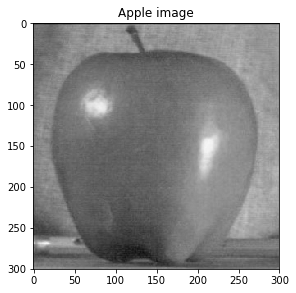

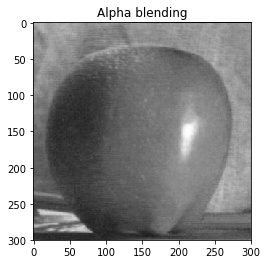

In [32]:
def alpha_blend(img1, img2, window):
    blend_img = simple_blend(img1, img2)
    row, col = blend_img.shape 
    x1 = np.ceil(col/2).astype('ubyte')-window   
    x2 = np.ceil(col/2).astype('ubyte')+window   
    x = np.arange(x1, x2)
    alpha = x/(x1-x2)-x2/(x1-x2)
    for i in range(0, row):
        for j in range(x1,x2):
            blend_img[i,j] = alpha[j - np.ceil(col/2).astype('ubyte')-window]*img1[i,j] + (1-alpha[j - np.ceil(col/2).astype('ubyte')-window])*img2[i,j]
    return blend_img 

Orange_img = io.imread("./images/orange.jpeg",as_grey=True)
Apple_img =  io.imread("./images/apple.jpeg",as_grey=True)                      


io.imshow(Orange_img)
plt.title('Orange image')
io.show()

io.imshow(Apple_img)
plt.title('Apple image')
io.show()


blend_img = alpha_blend(Orange_img,Apple_img, 50)

plt.imshow(blend_img,cmap = cm.gray)
plt.title ('Alpha blending')

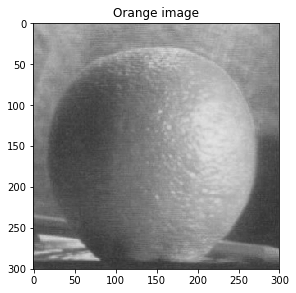

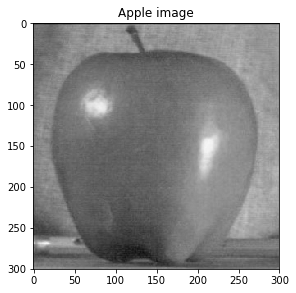

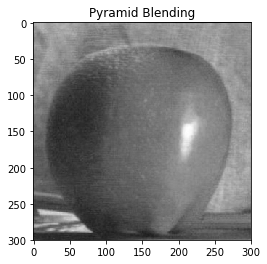

In [34]:
def pyramid_blend (img1, img2):
    row, col = img1.shape
    #Laplacian pyramids of 2 images
    pl_img1 = tuple(transform.pyramid_laplacian(img1, 6))
    pl_img2 = tuple(transform.pyramid_laplacian(img2, 6))
    
    #define a mask (0 at the left, 1 at the right)
    mask = np.zeros(img1.shape).astype(float)/255
    mask[:, : int(np.ceil(col/2))] = 1.0
    mask[:, int(np.ceil(col/2)) :] = 0.0
    #create gaussian of mask
    gaussian_mask = tuple(transform.pyramid_gaussian(mask, 6))

    #blend two Laplacian pyramids applying mask
    blended_pyr = []
    k = len(gaussian_mask)
    for i in range(0,k):
        p1= gaussian_mask[i]*pl_img1[i]
        p2=(1 - gaussian_mask[i])*pl_img2[i]
        blended_pyr.append(p1 + p2)
  
    #collapse the pyramid
    pyr = blended_pyr[6]  
    for i in range(5,-1,-1):
        pyr = transform.pyramid_expand(pyr) 
        if pyr.shape > blended_pyr[i].shape:
            pyr = np.delete(pyr, (-1), axis=0)
            pyr = np.delete(pyr, (-1), axis=1)
        pyr = pyr + blended_pyr[i]
    return pyr

    
Orange_img = io.imread("./images/orange.jpeg",as_grey=True)
Apple_img =  io.imread("./images/apple.jpeg",as_grey=True)                      


io.imshow(Orange_img)
plt.title('Orange image')
io.show()

io.imshow(Apple_img)
plt.title('Apple image')
io.show()

plt.imshow(blend_img, cmap = cm.gray)
plt.title ('Pyramid Blending')
io.show()